# On Statistical Distributions

Agenda:  
1. Distinguish between discrete and continuous variables   
2. Describe and create PMF's and CDF's   
3. Identify descrete distributions: uniform, bernouli, binomial,   
4. Identify continuous distributions: Normal, standard normal (z)   

In [119]:
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

Statistical distributions will be relevant throughout the bootcamp.  They will:

1. Allow us to conduct statistical tests to judge the validity of conclusions during hypothesis testing. 
2. Provide the foundation for specific assumptions of linear regression.
3. Appear in the cost functions tied to logistic regression and other models.
4. Drive the classification decisions made in parametric models, such as Naive-Bayes. 

# 1. Discrete vs. Continuous Variables
A fundamental distinction among kinds of distributions is the distinction between discrete and continuous variables. A distribution of a discrete variable takes on countable values, like integers. Examples would be 

- the number of times a coin lands on heads 
- the number of customers arriving in a store in an hour 
- the number of runs scored in a baseball game.  

A continuous distribution, on the other hands takes on a continuum of values, like real numbers. Think measurements, like:

- The weight of a newborn baby
- The time it takes for a train to arrive at a station
- The brightness of a planet

The distinction between descrete and continuous is very important to have in your mind, and can easily be seen in plots. 

Let's do a quick exercise. There are two tasks.  

1. First, simply change the color of the plots representing descrete data to orange and the plots represent continous data to blue.
2. Attach the titles to the distributions you think reflect the data set described.

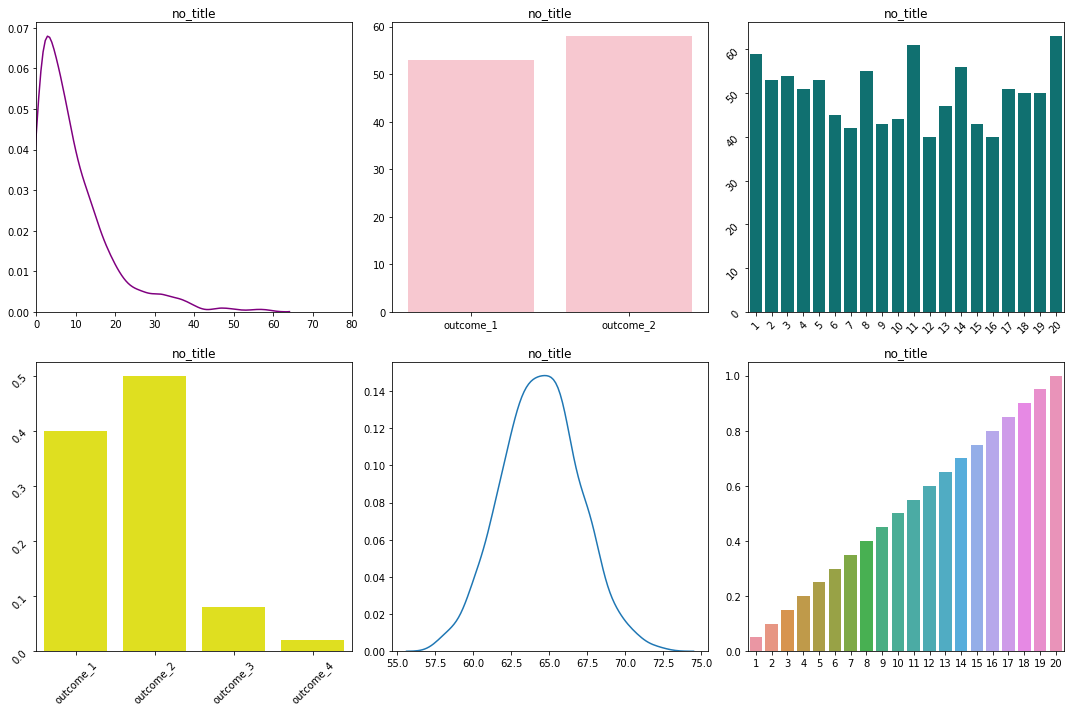

In [120]:

title_1 = "height_of_us_women in inches"
title_2 = 'result of flipping a coin 100 times'
title_3 = 'result of rolling a 20 sided dice 1000 times'
title_4 = 'the length of time from today a computer part lasts'
title_5 = 'probability that a picture is a chihauhua\n, a muffin, a bird, or a piece of pizza\n as would guess a neural network'
title_6 = 'probability of rolling a value equal to or below\n a certain number on a 20 sided dice'
no_title = 'no_title'

fig, ax = plt.subplots(2,3, figsize=(15,10))

sns.kdeplot(np.random.exponential(10, size=1000), ax=ax[0][0], color='purple')
ax[0][0].set_xlim(0,80)
ax[0][0].set_title(no_title)

sns.barplot(['outcome_1', 'outcome_2', 'outcome_3', 'outcome_4'], [.4,.5,.08,.02], ax=ax[1][0], color='yellow')
ax[1][0].tick_params(labelrotation=45)
ax[1][0].set_title(no_title)

sns.kdeplot(np.random.normal(64.5, 2.5, 1000), ax=ax[1][1])
ax[1][1].set_title(no_title)

sns.barplot(x=['outcome_1','outcome_2'], y=[sum(np.random.binomial(1,.5, 100)),100 - sum(np.random.binomial(1,.5, 100))], ax=ax[0][1], color='pink')
ax[0][1].set_title(no_title)

sns.barplot(x=list(range(1,21)), y=np.unique(np.random.randint(1,21,1000), return_counts=True)[1], ax=ax[0][2], color='teal')
ax[0][2].tick_params(labelrotation=45)
ax[0][2].set_title(no_title)

sns.barplot(list(range(1,21)), np.cumsum([1/20 for number in range(1,21)]), ax=ax[1][2])
ax[1][2].set_title(no_title)

plt.tight_layout()

## Discrete Distributions

Now that we have made the distinction between discrete and continuous clear, let's dive deeper into each category. 

### Probability Mass Function (PMF)

The $\bf{probability\ mass\ function\ (pmf)}$ for a random variable gives, at any value $k$, the probability that the random variable takes the value $k$. Suppose, for example, that I have a jar full of lottery balls containing:
- 50 "1"s,
- 25 "2"s,
- 15 "3"s,
- 10 "4"s

We might then represent this function pictorially as follows:

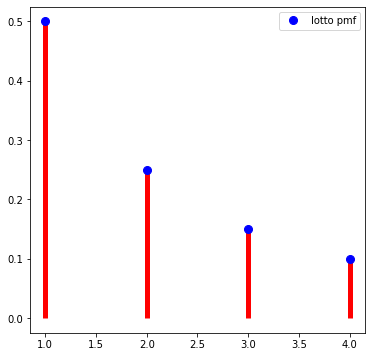

In [122]:
# Plot here!

x = range(1, 5)
lotto_dict = {1: 0.5, 2: 0.25, 3: 0.15, 4:.1}
y = [lotto_dict[num] for num in x]

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.plot(x, y, 'bo', ms=8, label='lotto pmf')
ax.vlines(x, 0, y, 'r', lw=5)
ax.legend(loc='best');

## Uniform Distribution

The uniform distribution describes a set of probabilities which are all equally likely.

A common example is the roll of a die.  

![dice](https://media.giphy.com/media/3ohhwLh5dw0i7iLzOg/giphy.gif)

Let's take the example of a twelve-sided die, and plot the PMF.  

The probability for rolling any number, is 1/12.

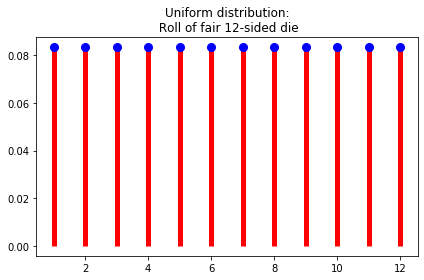

In [123]:
rolls = range(1,13)
# Equal roll probability for a fair die
roll_probs = np.full((1,12), 1/12).flatten()
fig, ax = plt.subplots()
ax.plot(rolls, roll_probs, 'bo', ms=8, label='rolls of a die')
ax.vlines(rolls, 0, roll_probs, 'r', lw=5)
# ax.legend(loc='best')
plt.title('Uniform distribution:\n Roll of fair 12-sided die')
plt.tight_layout();

### Cumulative Distribution Function (CDF)

The cumulative distribution function describes the probability that your result will be of a value equal to or below a certain value. It can apply to both discrete or continuous functions.

For the scenario above, the CDF would describe the probability of drawing a ball equal to or below a certain number.  

In order to create the CDF, we:
- align the values from least to greatest
- for each value, count the number of values that are less than or equal to the current value
- divide that count by the total number of values

In [124]:
# align the values
lotto_dict = {0:0, 1:50, 2:25, 3:15, 4:10}
values = list(lotto_dict.keys())
# count the number of values that are less than or equal to the current value
count_less_than_equal = np.cumsum(list(lotto_dict.values()))
# divide by total number of values
prob_less_than_or_equal = count_less_than_equal/sum(lotto_dict.values()) 
values

[0, 1, 2, 3, 4]

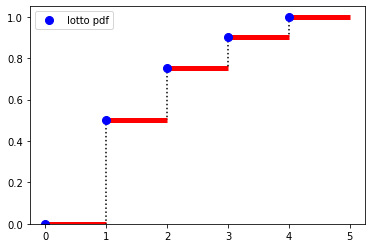

In [125]:
fig, ax = plt.subplots()
ax.plot(values, prob_less_than_or_equal, 'bo', ms=8, label='lotto pdf')
for i in range(0,5):
    ax.hlines(prob_less_than_or_equal[i], i,i+1, 'r', lw=5,)
for i in range(0,4):
    ax.vlines(i+1, prob_less_than_or_equal[i+1],prob_less_than_or_equal[i],  linestyles='dotted')
ax.legend(loc='best' )
ax.set_ylim(0);

# Pair Program
Taking what we know about cumulative distribution functions, create a plot of the CDF of a fair 12-sided die.

In [126]:
# Your code here

In [128]:
np.insert(cumu_probs,0,0,axis=0)

array([0.        , 0.        , 0.08333333, 0.16666667, 0.25      ,
       0.33333333, 0.41666667, 0.5       , 0.58333333, 0.66666667,
       0.75      , 0.83333333, 0.91666667, 1.        ])

# Bernouli

The Bernouli distribution is the discrete distribution that describes a two-outcome trial, such as heads or tails.  The distribution is described by the probability of an one random variable of the value 1 associated with the probability p, and its correlary, the probability q, associated with 0  and taking the probability 1-p. 

PMF: 
${\displaystyle {\begin{cases}q=1-p&{\text{if }}k=0\\p&{\text{if }}k=1\end{cases}}}$

Take for example penalty kicks in soccer. Assuming the probability of scoring a goal is .75, the Bernouli distribution is:


![panenka](https://media.giphy.com/media/Jy1R6jdp8uXok/giphy.gif)

Text(0.5, 1.0, 'Bernouli Distribution of Penalty Kicks')

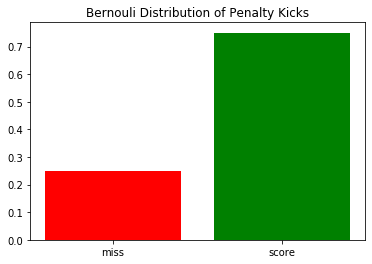

In [130]:
# probability of scoring
p = .75
# probability of missing
q = 1 -.75

fig, ax = plt.subplots()
ax.bar(['miss', 'score'],[q,p], color=['red','green'])
ax.set_title('Bernouli Distribution of Penalty Kicks')

The uniform distribution describes a set of equal probabilities across all outcomes.  

The pmf of a discrete uniform distribution is simply:

$ f(x)=\frac{1}{n} $

For the roll of a fair 12 sided die, the pmf is created like so:

In [132]:
# Let's check that with some built in methods
stats.binom.pmf(7, 10, 0.75)


0.2502822875976565

## Binomial

The binomial distribution results from running multiple Bernouli trials.  The binomial describes the probability of a certain number of successes occuring in the specified number of trials. 

Let's resume our penalty kick example. Suppose we take for example a 10-kick penalty shoot after a extra time runs out.

The binomial distribution can tell me what the probability is that the shootout will result in exactly exactly $k$ goals out of $n$ shots ($k < n$).

$\Large f(x) = {n \choose k}p^k(1 - p)^{n - k}$

Note: ${n\choose k} = \frac{n!}{k!(n - k)!}$, the number of ways of choosing $k$ objects from a total of $n$.

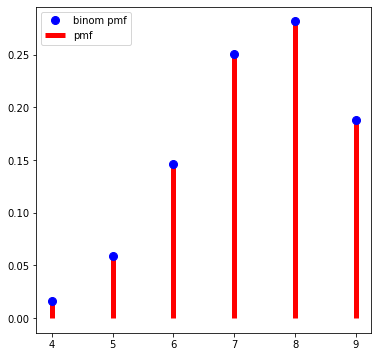

In [133]:
n = 10
p = 0.75
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
x = np.arange(stats.binom.ppf(0.01, n, p),
              stats.binom.ppf(0.99, n, p))

ax.plot(x, stats.binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, stats.binom.pmf(x, n, p), 'r', linewidth=5,
          label='pmf')
ax.legend(loc='best');

## Center, Spread and Shape
Statistical distributions can be discribed in terms of moments. Each moment describes a different aspect of a distributions shape.  For the binomial distribution, we will look at the first two moments: expected value and the variance.

### Expected Value/Center

The first moment describes the 'center' of the distribution. The 'center' refers loosely to the middle-values of a distribution, and is measured more precisely by notions like the mean, the median, and the mode.

For a discrete distribution, working from the vantage point of a collected sample of n data points:

mean = $\Large\mu = \frac{\Sigma^n_{i = 1}x_i}{n}$

If we are working from the vantage point of known probabilities, the mean is referred to as the expected value. That is, what is the value we expect to see based on the given parameters, i.e. probability of success p and number of trials n. The expected value of the Binomial distribution is: 
 
${\displaystyle \operatorname {E} [X]=np.}$

For the shootout example, we expect to see 10*.75 = 7.5 goals on average.
 

### Variance/Standard Deviation
Variance describes the spread of the data.  The 'spread' refers loosely to how far away the more extreme values are from the center.

Standard deviation is the square root of variance, effectively measures the *average distance away from the mean*.

From the standpoint of a sample, the variance of a discrete distribution of n data points is:

std = $\Large\sigma = \sqrt{\frac{\Sigma^n_{i = 1}(x_i - \mu)^2}{n}}$

Given the parameters of our biniomial distribution, the variance is described by:

${\displaystyle \operatorname {Var} (X)=np(1-p).}$

For the shootout, the variance is equal to 10*.75 * (1-.75) = 1.875

We can calculate the standard deviation, which describes the spread in terms of the original unit (goals), by taking the square root.

std = sqrt(1.875) = 1.369



In [134]:
# Again, check with builtins
mean, var = stats.binom.stats(n, p, moments='mv')
print(f"mean: {mean}, var: {var}, std: {np.sqrt(var)}")

mean: 7.5, var: 1.875, std: 1.3693063937629153


# Code along
What is the probability of a team scoring 7 goals in a shootout?




In [135]:
# Code here

# Continuous Distributions

As we alluded to earlier, a continuous function represents an infinite number of possible values within a range. One way to think about it is that continuous variables are obtained by measuring, while discrete are obtained by counting.  

We could be speaking about the distribution of heights of the US adult populations, the distribution of systolic blood pressure of students enrolled in private college,  the distribution of seconds before the first customer arrives at a shop.  Within the range of possible values, there are no discrete values by which we can associate outcomes. An outcome can be any value within the range.  Because of this, the probability associated with any specific value is zero, and we can only speak about probability in terms of the probability that the outcome will be between two outcomes. 

## The Normal/Gaussian Distribution 

The normal distribution describes many phenomena. Think of anything that has a typical range:
- human body temperatures
- sizes of elephants
- sizes of stars
- populations of cities
- IQ
- Heart rate

Among human beings, 98.6 degrees Fahrenheit is an _average_ body temperature. Many folks' temperatures won't measure _exactly_ 98.6 degrees, but most measurements will be _close_. It is much more common to have a body temperature close to 98.6 (whether slightly more or slightly less) than it is to have a body temperature far from 98.6 (whether significantly more or significantly less). This is a hallmark of a normally distributed variable.

Similarly, there are large elephants and there are small elephants, but most elephants are near the average size.

The normal distribution is _very_ common in nature (**Why?**) and will arise often in your work. Get to know it well!

You will recognize it by its characteristic bell curve. 

![normal_curve](img/IQ_normal.png)

### Probability Density Function and Cumulative Distribution Function

The bell curve is an example of a $\bf{probability\ density\ function\ (pdf)}$, which plays the same role for continuous distributions that the pmf plays for discrete distributions.


$\Large f(x) = \frac{1}{\sigma\sqrt{2\pi}}exp\left[\frac{-(x - \mu)^2}{2\sigma^2}\right]$

Since a continuous random variable can take any of an _infinite_ number of values, it doesn't make sense to speak of the probability that the variable take any particular value. Think of throwing a dart at a dartboard. The chance that the dart hit any particular point on the board is _zero_. But we can still make sense of the idea of the probability of the variable taking a value _in a particular range_, and this is why we use the word 'density' for continuous distributions.

You can get Euler's number $e$ from `numpy.e` or (the method) `numpy.exp()`.

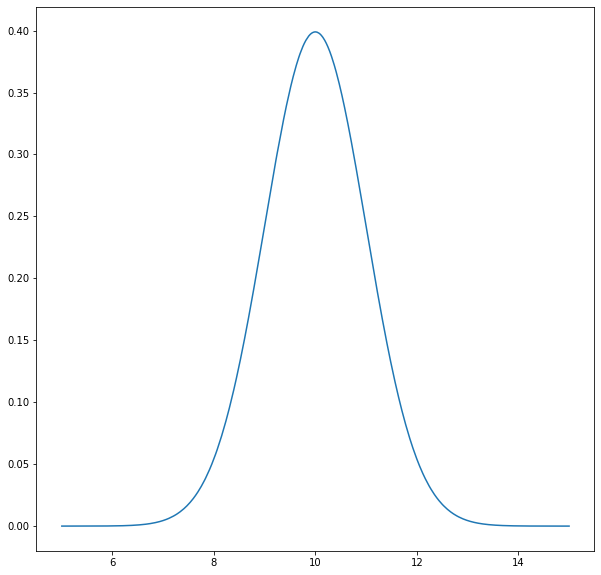

In [136]:
fig, ax = plt.subplots(figsize=(10,10))
uniform = sorted(np.random.uniform(5,15, 1000))
probs = [stats.norm(10).pdf(num) for num in uniform]
plt.plot(uniform, probs)


The $\bf{cumulative\ distribution\ function\ (cdf)}$ gives, at any value $x$, the probability that a continuous variable take a value that is _less than or equal to $x$_.

The cdf will therefore be, for any distribution, a monotonically increasing (or, strictly, nondecreasing) function. That is, $cdf(x_2) \geq cdf(x_1)$ if $x_2 \geq x_1$.

[Here's](http://www.mas.ncl.ac.uk/~nmf16/teaching/mar1002/lect07.pdf) a helpful document on continuous random variables.

Text(0.5, 1.0, 'CDF of Normal Distribution')

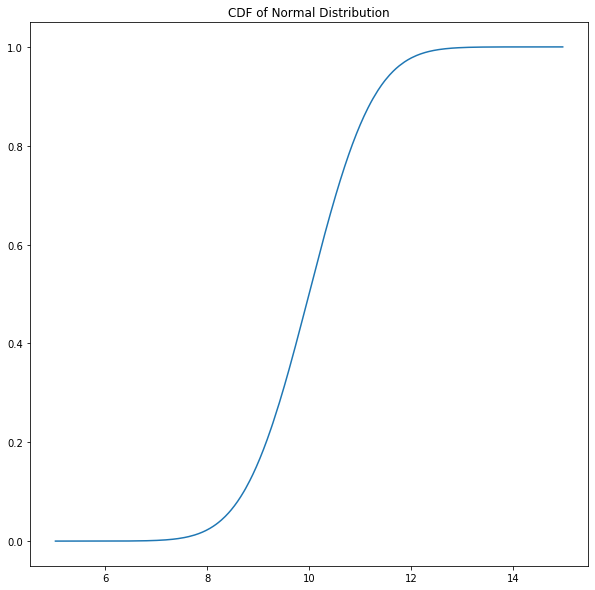

In [137]:
fig, ax = plt.subplots(figsize=(10,10))
uniform = sorted(np.random.uniform(5,15, 1000))
probs = [stats.norm(10, 1).cdf(num) for num in uniform]
ax.plot(uniform, probs)
ax.set_title("CDF of Normal Distribution")

## Center/Mean/Expected Value

We describe the shape of continuous distributions with the same language that we used with discrete.  The expected value of a discrete distribution is the weighted sum of all values of x, where the weight is their probability.  Since there are no discrete values for x in the continuous distribution, to gain the weighted sum of the probabilities, we take the integral:

mean = $\Large\mu = \int_Xxp(x)dx$, <br/>

where $p(x)$ is the probability density function associated with the distribution $X$.

When working in numpy, the mean is represented by the `loc` parameter, and specifies the center of the distribution on the x-axis

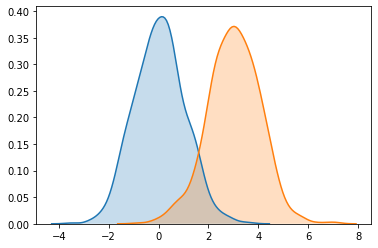

In [138]:
fig, ax = plt.subplots()
sns.kdeplot(np.random.normal(loc = 0, size =1000), ax = ax, shade='blue')
sns.kdeplot(np.random.normal(loc = 3, size =1000), ax = ax, shade='red')

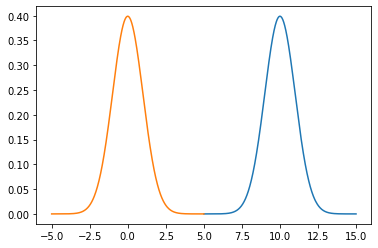

In [139]:
uniform_10 = sorted(np.random.uniform(5, 15, 2000))
probs_10 = [stats.norm(10).pdf(num) for num in uniform_10]

uniform_0 = sorted(np.random.uniform(-5, 5, 2000))
probs_0 = [stats.norm(0).pdf(num) for num in uniform_0]

plt.plot(uniform_10,probs_10)
plt.plot(uniform_0, probs_0)

## Spread/Variance/std

std = $\Large\sigma = \sqrt{\int_X(x - \mu)^2p(x)dx}$, <br/> where again $p(x)$ is the probability density function of X.



In numpy, we designate the standard deviation with the `scale` parameter. Alter the parameter below.  Larger numbers make the distribution wider, smaller numbers make it skinnier.


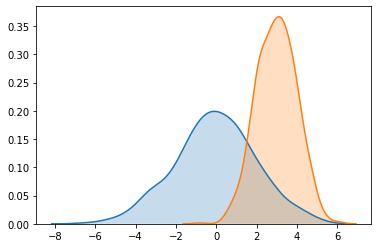

In [82]:
fig, ax = plt.subplots()
sns.kdeplot(np.random.normal(loc = 0, scale=2.0, size =1000), ax = ax, shade='blue')
sns.kdeplot(np.random.normal(loc = 3, scale=1.0,  size =1000), ax = ax, shade='red')

## Skew 

We will touch briefly on the third and fourth moments for the normal curve. Skew is a measure of assymemtry.  A skew of zero is perfectly symetrical about the mean.   
![skew](img/skew.png)


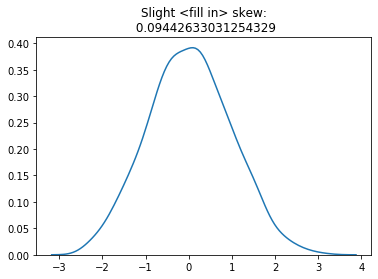

In [96]:
fig, ax = plt.subplots()
normal_sample = np.random.normal(0,1, 1000)
sns.kdeplot(normal_sample, ax = ax)
ax.set_title(f'Slight <fill in> skew:\n {stats.skew(normal_sample)}');

### Transforming  Left/Negatively Skewed Data

We may want to transform our skewed data to make it approach symmetry.

Common transformations of this data include 

#### Square root transformation:
Applied to positive values only. Hence, observe the values of column before applying.
Cube root transformation:

#### The cube root transformation: 
involves converting x to x^(1/3). This is a fairly strong transformation with a substantial effect on distribution shape: but is weaker than the logarithm. It can be applied to negative and zero values too. Negatively skewed data.
Logarithm transformation:

#### The logarithm:
x to log base 10 of x, or x to log base e of x (ln x), or x to log base 2 of x, is a strong transformation and can be used to reduce right skewness.

## Left/Negatively Skewed Data

### Square transformation:
The square, x to x2, has a moderate effect on distribution shape and it could be used to reduce left skewness.
Another method of handling skewness is finding outliers and possibly removing them

## Kurtosis



![kurtosis](img/kurtosis.png)

## Standard Normal Distribution or the Z Distribution

A standard normal distribution has a mean of 0 and variance of 1. This is also known as a z distribution. You may see the notation 

$ N(μ,σ2)$

where N signifies that the distribution is normal, μ is the mean, and σ2 is the variance. 

![norm_to_z](img/norm_to_z.png)




A Z distribution may be described as N(0,1).

![z_curve](img/z_curve.png)

## Empirical Rule

![empirical_rule](img/empirical_rule.png)